In [10]:
from keras import Sequential
from keras.layers import Dense,Dropout,LeakyReLU,BatchNormalization
from keras.layers import Conv2D,Flatten,Reshape,UpSampling2D,MaxPooling2D
from keras.optimizers import RMSprop,Adam
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [11]:
img_size=28
channel=1
input_shape=(img_size,img_size,channel)
dropout_prob=0.4

In [12]:
def discriminator():
    net = Sequential()
    net.add(Conv2D(filters=64,kernel_size=5,strides=2,padding='same',input_shape=input_shape,name='d_conv1')) #(28,28,64)
#     net.add(BatchNormalization(momentum=0.9))
    net.add(LeakyReLU())
    net.add(Dropout(dropout_prob))
#     net.add(MaxPooling2D(pool_size=2,strides=2)) #(14,14,64)
    
    net.add(Conv2D(filters=128,kernel_size=5,strides=2,padding='same',name='d_conv2')) #(14,14,128)
#     net.add(BatchNormalization(momentum=0.9))
    net.add(LeakyReLU())
    net.add(Dropout(dropout_prob))
#     net.add(MaxPooling2D(pool_size=2,strides=2)) #(7,7,64) 
    
    net.add(Conv2D(filters=256,kernel_size=5,strides=2,padding='same',name='d_conv3')) #(7,7,256)
#     net.add(BatchNormalization(momentum=0.9))
    net.add(LeakyReLU())
    net.add(Dropout(dropout_prob))
#     net.add(MaxPooling2D(pool_size=2,strides=2)) #(4,4,128) 

    net.add(Conv2D(filters=512,kernel_size=5,strides=1,padding='same',name='d_conv4')) #(7,7,256)
#     net.add(BatchNormalization(momentum=0.9))
    net.add(LeakyReLU())  
    net.add(Dropout(dropout_prob))

    net.add(Flatten())
#     net.add(Dense(units=1024,name='d_fc1'))
#     net.add(LeakyReLU())
#     net.add(Dropout(dropout_prob))
    net.add(Dense(units=1,name='d_fc2',activation='sigmoid'))
    return net

In [13]:
def generator():
    net = Sequential()
    net.add(Dense(units=7*7*128,input_dim=100,name='g_fc',activation='elu'))
    net.add(BatchNormalization(momentum=0.9)) #KEY
    net.add(LeakyReLU()) #KEY
    net.add(Reshape((7,7,128))) 
    net.add(Dropout(dropout_prob)) #KEY
    net.add(UpSampling2D()) #(14,14,256)
    net.add(Conv2D(filters=64,kernel_size=5,padding='same',name='g_conv1')) #(14,14,128)
    net.add(BatchNormalization(momentum=0.9))
    net.add(LeakyReLU())
    
    net.add(UpSampling2D())
    net.add(Conv2D(filters=32,kernel_size=5,padding='same',name='g_conv2')) #(28,28,64)
    net.add(BatchNormalization(momentum=0.9))  
    net.add(LeakyReLU())
    
#     net.add(Conv2D(filters=32,kernel_size=5,padding='same',name='g_conv3')) #(28,28,32)
#     net.add(BatchNormalization(momentum=0.9))
#     net.add(LeakyReLU())
    
    net.add(Conv2D(filters=1,kernel_size=5,padding='same',name='g_conv3',activation='sigmoid')) #(28,28,1)
    return net

In [14]:
net_D = discriminator()
net_G = generator()

In [15]:
net_D.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
d_conv1 (Conv2D)             (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
d_conv2 (Conv2D)             (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 7, 7, 128)         0         
_________________________________________________________________
d_conv3 (Conv2D)             (None, 4, 4, 256)         819456    
__________

In [16]:
net_G.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
g_fc (Dense)                 (None, 6272)              633472    
_________________________________________________________________
batch_normalization_5 (Batch (None, 6272)              25088     
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 6272)              0         
_________________________________________________________________
reshape_3 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 7, 7, 128)         0         
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 14, 14, 128)       0         
_________________________________________________________________
g_conv1 (Conv2D)             (None, 14, 14, 64)        204864    
__________

In [17]:
optimizer_D=RMSprop(lr=0.0008,decay=1e-10,clipvalue=1.0)
optimizer_A=Adam(lr=0.0004,decay=1e-10,clipvalue=1.0)
model_D=Sequential()
model_D.add(net_D)
model_D.compile(loss='binary_crossentropy',optimizer=optimizer_D,metrics=['accuracy'])

model_A=Sequential()
model_A.add(net_G)
net_D.trainable=False
model_A.add(net_D)
model_A.compile(loss='binary_crossentropy',optimizer=optimizer_A,metrics=['accuracy'])

In [18]:
model_A.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_6 (Sequential)    (None, 28, 28, 1)         915841    
_________________________________________________________________
sequential_5 (Sequential)    (None, 1)                 4311553   
Total params: 5,227,394
Trainable params: 903,105
Non-trainable params: 4,324,289
_________________________________________________________________


In [19]:
from keras.datasets import mnist
(x_train,_),(_,_)=mnist.load_data()
x_train=x_train.reshape(-1,img_size,img_size,channel)
x_train=x_train.astype('float')/255
m=x_train.shape[0]
Z=np.random.random(size=(m,100))
def get_random_batch(data,batch_size):
    random_ind=np.random.choice(m,batch_size,replace=True)
    return data[random_ind]

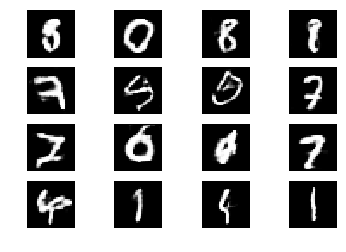

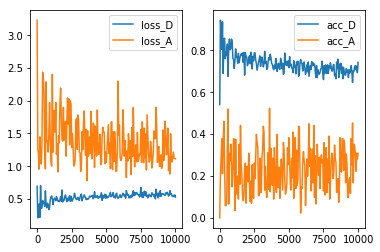

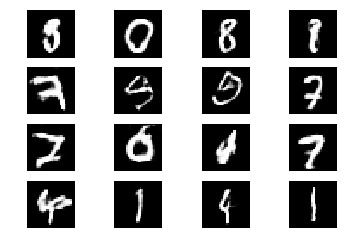

In [20]:
from IPython.display import clear_output
batch_size=256
loss_D=[]
loss_A=[]
acc_D=[]
acc_A=[]
plot_iteration=[]
viz_noise = np.random.random(size=(16,100))

for i in range(10001):
    noise_batch=get_random_batch(Z,batch_size)
    image_batch=get_random_batch(x_train,batch_size)
    fake_batch=net_G.predict(noise_batch)
    mix_batch=np.concatenate((fake_batch,image_batch),axis=0)
    label=[0]*batch_size + [1]*batch_size
    state_D=model_D.train_on_batch(mix_batch,label)
    
    noise_batch=get_random_batch(Z,batch_size)
    label=[1]*batch_size
    state_A=model_A.train_on_batch(noise_batch,label)
    
    if i%50==0:
        clear_output(wait=True)
        plot_iteration.append(i)
        loss_D.append(state_D[0])
        loss_A.append(state_A[0])
        acc_D.append(state_D[1])
        acc_A.append(state_A[1])
        fig,(ax1,ax2)=plt.subplots(1,2)
        ax1.plot(plot_iteration,loss_D,label='loss_D')
        ax1.plot(plot_iteration,loss_A,label='loss_A')
        ax2.plot(plot_iteration,acc_D,label='acc_D')
        ax2.plot(plot_iteration,acc_A,label='acc_A')
        ax1.legend()
        ax2.legend()
        plt.show()
        images=net_G.predict(viz_noise)
        for im in range(images.shape[0]):
            plt.subplot(4,4,im+1)
            plt.imshow(np.squeeze(images[im]),cmap='gray')
            plt.axis('off')        

In [21]:
def plot_z(z):
    g=net_G.predict(z)
    conf=model_A.predict(z)[0][0]
    plt.imshow(np.squeeze(g),cmap='gray')
    plt.xlabel(conf)

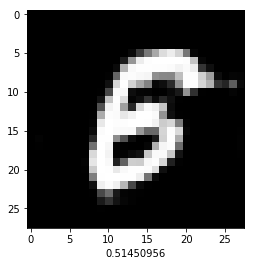

In [22]:
z1=np.random.random((1,100))
plot_z(z1)